In [2]:
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
from schemdraw.elements import Element2Term
from schemdraw import pictorial

prop_cycle = plt.rcParams['axes.prop_cycle']
_colors = prop_cycle.by_key()['color']

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

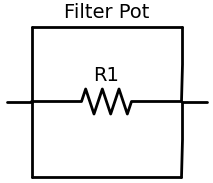

In [3]:
import schemdraw
import schemdraw.elements as elm

class FilterPot(elm.ElementCompound):
    """
    Filter Pot
    """
    def __init__(self, unit: float = 1.5, **kwargs):
        super().__init__(unit=unit, **kwargs)

    def setup(self):
    
        r1 = self.add(elm.Resistor().label('R1').length(3))
        
        self.add(elm.Line().down())
        self.add(elm.Line().left().tox(r1.start))
        self.add(elm.Line().up())
        self.add(elm.Line().up())
        self.add(elm.Line().right().tox(r1.end).label('Filter Pot'))
        self.add(elm.Line().down())

        line_in = self.add(elm.Line().left().at(r1.start).length(0.5))
        line_end = self.add(elm.Line().right().at(r1.end).length(0.5))
        
    
        # Define external connection points
        self.anchors['start'] = line_in.end
        self.anchors['end'] = line_end.end 


with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    FilterPot()


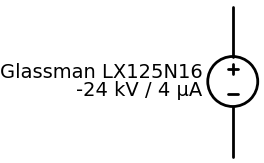

In [4]:
elm.SourceV().theta(90).label("Glassman LX125N16\n-24 kV / 4 μA", loc="top")


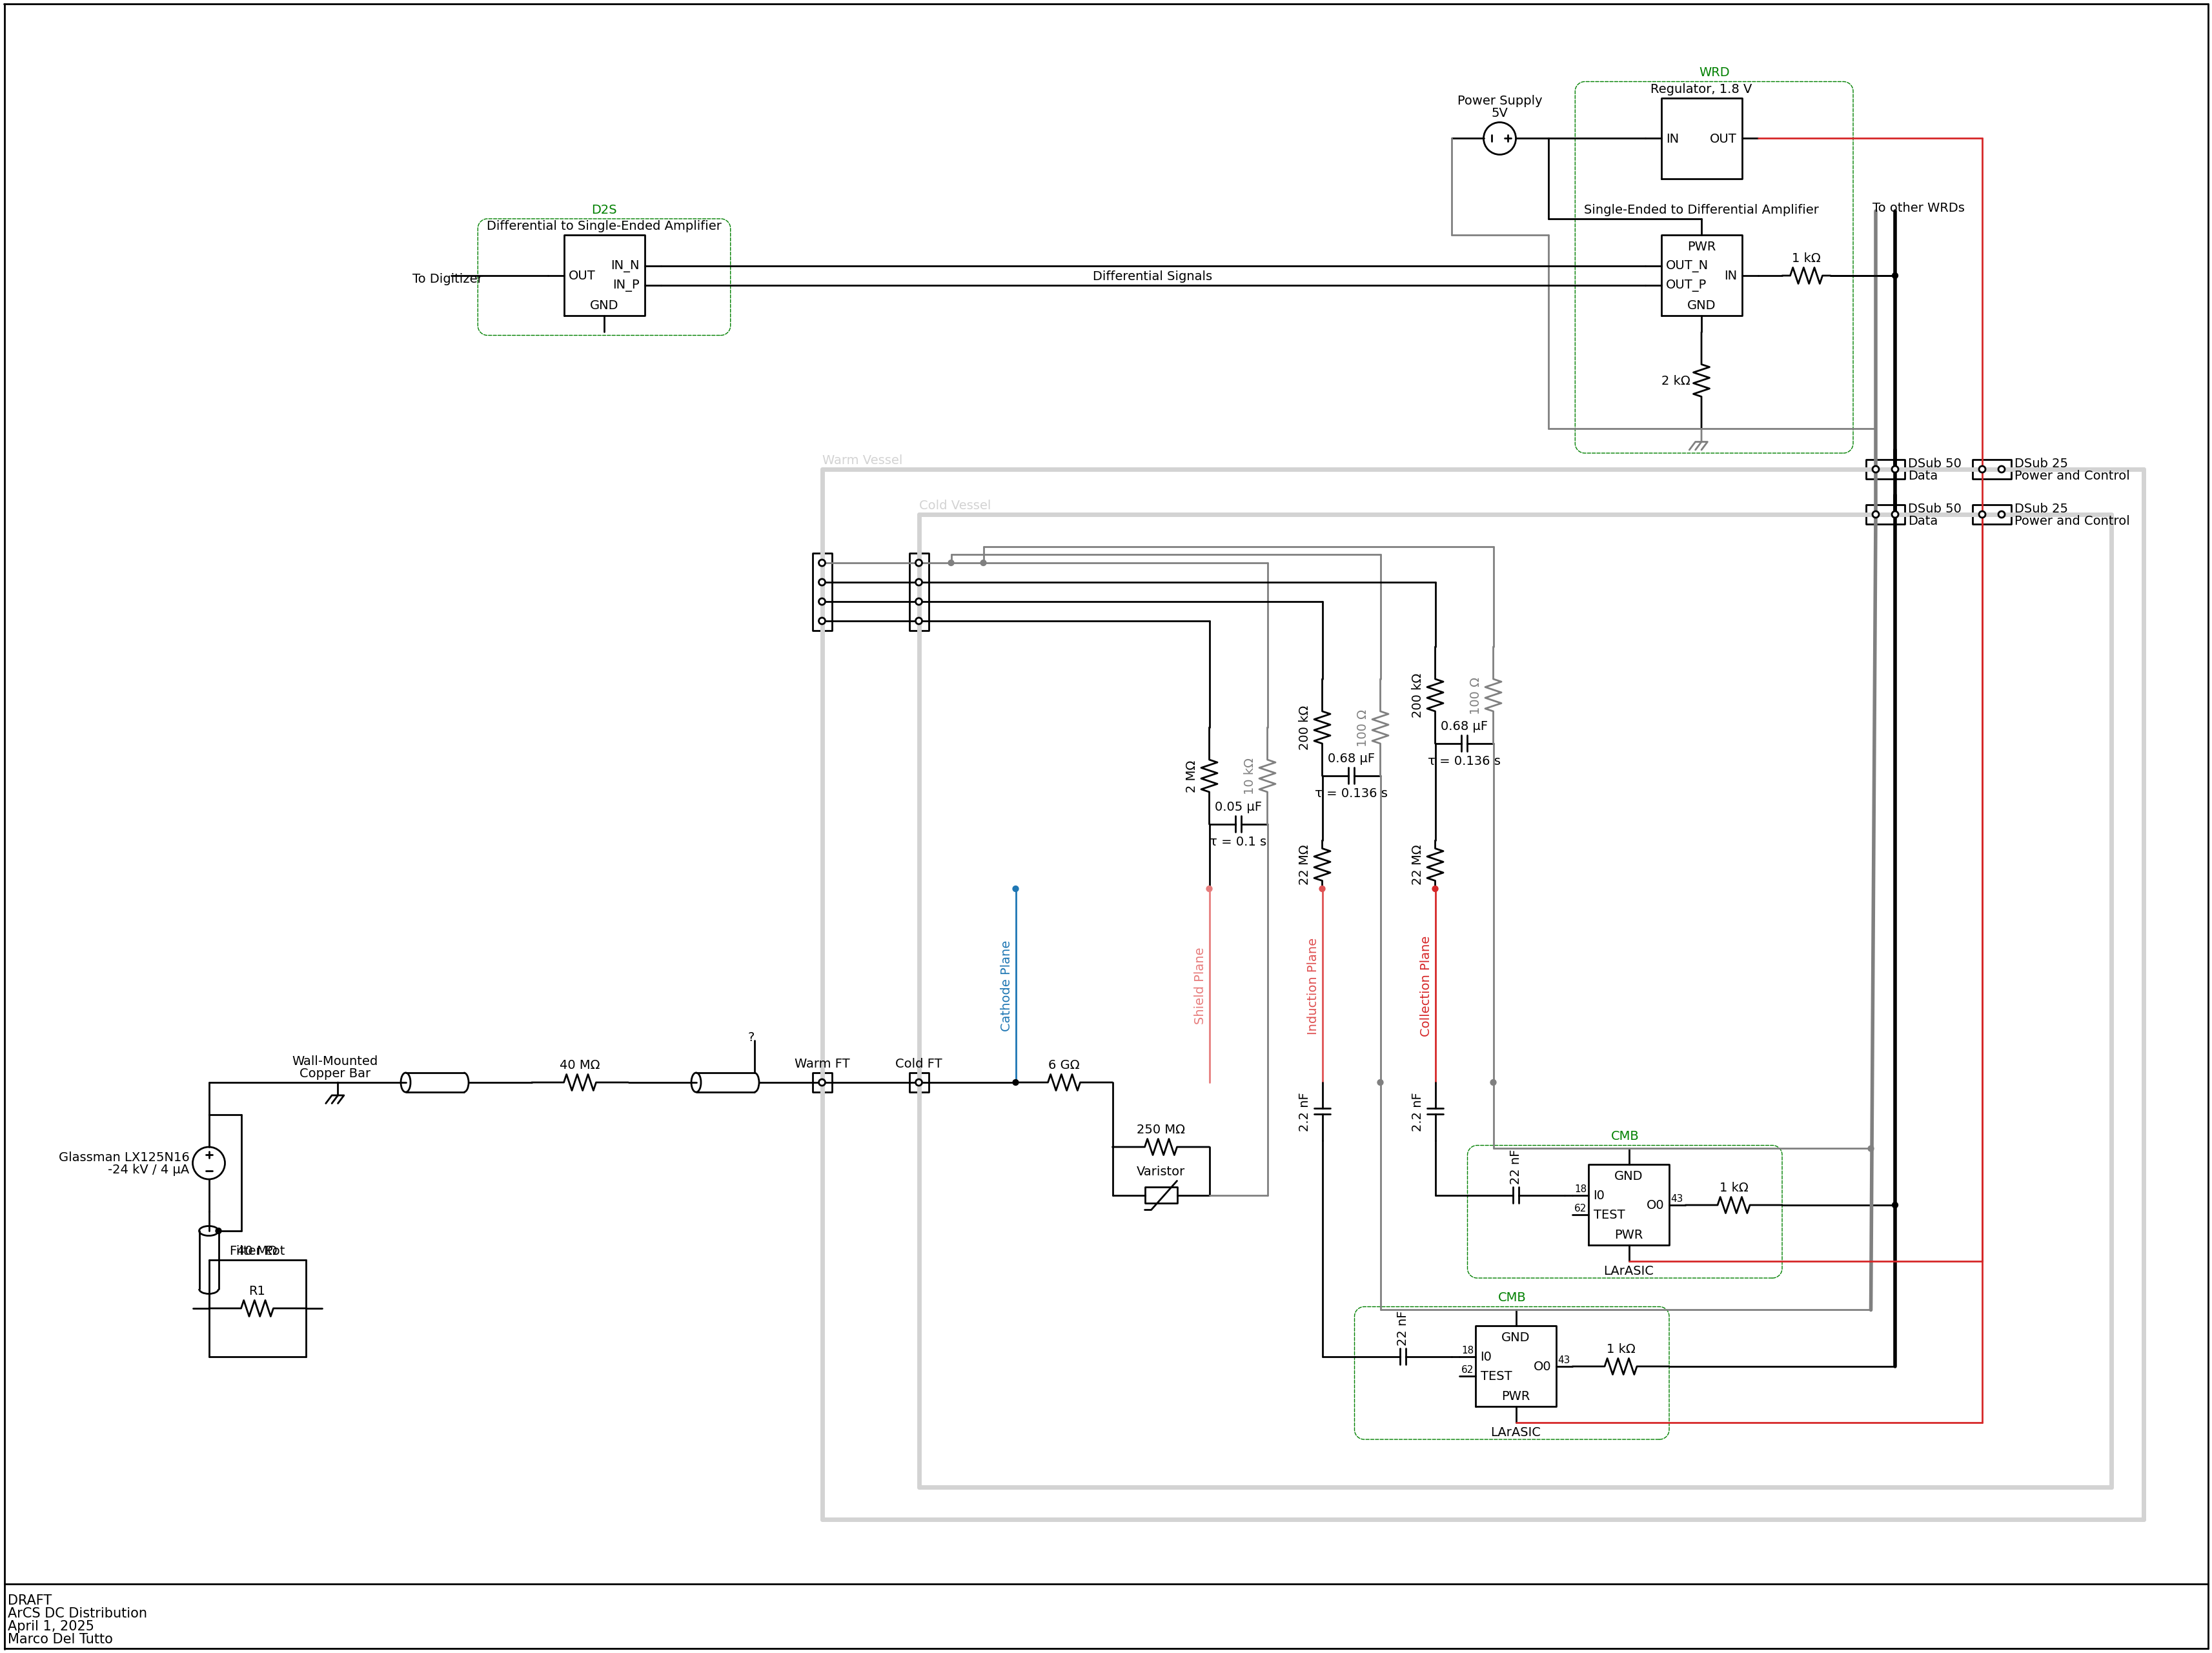

In [5]:
with schemdraw.Drawing(file='arcs_electronics.pdf') as d:
    d.config(fontsize=14)

    PS = elm.SourceV().theta(90).label("Glassman LX125N16\n-24 kV / 4 μA", loc="top")
    CO = elm.Coax().at(PS.start).down().length(3).label("", loc="top")
    # __ = elm.GroundChassis().at(PS.start).down()

    # Glassman Ground
    __ = elm.Line().at(PS.end).right().length(1)
    __ = elm.Line().down().toy(CO.shieldstart_top)
    __ = elm.Line().left().tox(CO.shieldstart_top)
    __ = elm.Dot()
    __ = elm.Line().at(PS.end).up().length(1)
    __ = elm.Line().right().length(4)
    __ = elm.GroundChassis().label("Wall-Mounted\nCopper Bar", loc="top")
    
    
    
    # __ = elm.Resistor().at(CO.end).right().label("40 MΩ", loc="top")
    __ = FilterPot().at(CO.end).right().label("40 MΩ", loc="top")
    __ = elm.Coax().right().length(6).label("", loc="top")
    __ = elm.Resistor().right().label("40 MΩ", loc="top")
    coax_3 = elm.Coax().right().length(6).label("", loc="top")
    __ = elm.Line().at(coax_3.shieldend_top).up().length(1)
    __ = elm.Label().label('?')
    ft_warm_hv = elm.Header(rows=1).at(coax_3.end-0.3).label('Warm FT', loc='top')
    __ = elm.Line().at(ft_warm_hv.pin1).right()
    ft_cold_hv = elm.Header(rows=1).at(__.end-0.3).label('Cold FT', loc='top')
    __ = elm.Line().at(ft_cold_hv.pin1)    
    
    D1 = elm.Dot(open=False)
    CA = elm.Line().up().length(6).label("Cathode Plane", loc="top", rotate=90).color(_colors[0])
    __ = elm.Dot(open=False).color(_colors[0])
    RT = elm.Resistor().at(D1.end).right().label("6 GΩ", loc="top")
    L1 = elm.Line().down().length(2)
    __ = elm.Resistor().right().label("250 MΩ", loc="top")
    __ = elm.Line().at(L1.end).down().length(1.5)
    VA = elm.Thermistor().right().label("Varistor", loc="top")
    __ = elm.Line().up().length(1.5)

    # Wire Bias FT
    d.move_from(CA.start, dx=-5, dy=12)
    # FT = elm.Header()
    ft_cold_wirebias = elm.Header().at((ft_cold_hv.pin1[0]-0.3, CA.end[1]+8))

    # Shield plan
    d.move_from(RT.end, dx=3, dy=0)
    SP = elm.Line().up().length(6).label("Shield Plane", loc="top", rotate=90).color(lighten_color(_colors[3], 0.6))
    __ = elm.Dot(open=False).color(lighten_color(_colors[3], 0.6))
    L2 = elm.Line().up().length(2)
    __ = elm.Capacitor().right().length(1.8).label("0.05 μF", loc="top").label("τ = 0.1 s", loc="bottom")
    RG = elm.Resistor().up().label("10 kΩ", loc="top", rotate=90).color('gray') 
    __ = elm.Resistor().at(L2.end).up().label("2 MΩ", loc="top", rotate=90)
    __ = elm.Line().up().toy(ft_cold_wirebias.pin4)
    __ = elm.Line().left().tox(ft_cold_wirebias.pin4)
    __ = elm.Line().at(RG.end).up().toy(ft_cold_wirebias.pin1).color('gray')
    LS = elm.Line().left().tox(ft_cold_wirebias.pin4).color('gray')

    __ = elm.Line().at(RG.start).down().toy(VA.end).color('gray')
    __ = elm.Line().left().tox(VA.end).color('gray')
    # __ = elm.GroundSignal().color('gray')
    # __ = elm.GroundChassis().color('gray')

    # Induction plane
    d.move_from(SP.start, dx=3.5, dy=0)
    IP = elm.Line().up().length(6).label("Induction Plane", loc="top", rotate=90).color(lighten_color(_colors[3], 0.8))
    __ = elm.Dot(open=False).color(lighten_color(_colors[3], 0.8))
    __ = elm.Resistor().up().length(1.5).label("22 MΩ", loc="top", rotate=90)
    L2 = elm.Line().up().length(2)
    __ = elm.Capacitor().right().length(1.8).label("0.68 μF", loc="top").label("τ = 0.136 s", loc="bottom")
    RG = elm.Resistor().up().label("100 Ω", loc="top", rotate=90).color('gray') 
    __ = elm.Resistor().at(L2.end).up().label("200 kΩ", loc="top", rotate=90)
    __ = elm.Line().up().toy(ft_cold_wirebias.pin3)
    __ = elm.Line().left().tox(ft_cold_wirebias.pin3)
    # __ = elm.Line().at(RG.end).up().toy(ft_cold_wirebias.pin1).color('gray')
    # LS = elm.Line().left().tox(ft_cold_wirebias.pin4).color('gray')

    __ = elm.Line().at(RG.end).up().toy(ft_cold_wirebias.pin1+0.25).color('gray')
    __ = elm.Line().left().tox(ft_cold_wirebias.pin1+1).color('gray')
    __ = elm.Line().down().toy(ft_cold_wirebias.pin1).color('gray')
    __ = elm.Dot().color('gray')
    
    __ = elm.Line().at(RG.start).down().toy(IP.start).color('gray')
    induction_gnd = elm.Dot(open=False).color('gray')


    # Collection plane
    d.move_from(IP.start, dx=3.5, dy=0)
    CP = elm.Line().up().length(6).label("Collection Plane", loc="top", rotate=90).color(_colors[3])
    __ = elm.Dot(open=False).color(_colors[3])
    __ = elm.Resistor().up().length(1.5).label("22 MΩ", loc="top", rotate=90)
    L2 = elm.Line().up().length(3)
    __ = elm.Capacitor().right().length(1.8).label("0.68 μF", loc="top").label("τ = 0.136 s", loc="bottom")
    RG = elm.Resistor().up().label("100 Ω", loc="top", rotate=90).color('gray') 
    __ = elm.Resistor().at(L2.end).up().label("200 kΩ", loc="top", rotate=90)
    __ = elm.Line().up().toy(ft_cold_wirebias.pin2)
    __ = elm.Line().left().tox(ft_cold_wirebias.pin2)
    # __ = elm.Line().at(RG.end).up().toy(ft_cold_wirebias.pin1).color('gray')
    # LS = elm.Line().left().tox(ft_cold_wirebias.pin4).color('gray')

    __ = elm.Line().at(RG.end).up().toy(ft_cold_wirebias.pin1+0.5).color('gray')
    __ = elm.Line().left().tox(ft_cold_wirebias.pin1+2).color('gray')
    __ = elm.Line().down().toy(ft_cold_wirebias.pin1).color('gray')
    __ = elm.Dot().color('gray')

    __ = elm.Line().at(RG.start).down().toy(CP.start).color('gray')
    collection_gnd = elm.Dot(open=False).color('gray')

    # Vacuum
    d.move_from(ft_cold_wirebias.pin2, dx=-1, dy=0)
    # __ = elm.Header()
    __ = elm.Line().left().at(ft_cold_wirebias.pin1).color('gray')
    __ = elm.Line().left().at(ft_cold_wirebias.pin2)
    __ = elm.Line().left().at(ft_cold_wirebias.pin3)
    LL = elm.Line().left().at(ft_cold_wirebias.pin4)
    ft_warm_wirebias = elm.Header().at(LL.end-0.3)

    # Readout - Induction
    pickup_c = elm.Capacitor().down().length(1.8).at(IP.start).label("2.2 nF", loc="top", rotate=90)

    # LArASIC Induction
    larasic_i = (elm.Ic()
                 .pin('L', 'TEST', pin='62')
                 .pin('L', 'I0', pin='18')
                 .pin('R', 'O0', pin='43')
                 .pin('T', 'GND', pin='')
                 .pin('B', 'PWR', pin='')
                 .at((pickup_c.end[0]+6, pickup_c.end[1]-7))
                 .label('LArASIC', loc='bottom').right().anchor('center'))

    __ = elm.Line().down().toy(larasic_i.I0)
    __ = elm.Line().right().length(1)
    cmb_c = elm.Capacitor().right().label("22 nF", loc="top", rotate=90)
    __ = elm.Line().right().tox(larasic_i.I0)

    __ = elm.Line().down().at(induction_gnd.start).toy(larasic_i.GND).color('gray')
    __ = elm.Line().right().tox(larasic_i.GND).color('gray')
    cmb_r = elm.Resistor().at(larasic_i.O0).label("1 kΩ", loc="top")

    elm.EncircleBox([larasic_i, cmb_c, cmb_r], padx=0, pady=0.1).linestyle('--').linewidth(1).color('green').label('CMB', loc='top', rotate=0)

    readout_l = elm.Line().right().length(7)
    readout_gnd = elm.Line().right().at(larasic_i.GND).length(11).color('gray')
    # __ = elm.Line().up().length(30)


    # Readout - Collection
    pickup_c = elm.Capacitor().down().length(1.8).at(CP.start).label("2.2 nF", loc="top", rotate=90)

    # LArASIC Collection
    larasic_c = (elm.Ic()
                 .pin('L', 'TEST', pin='62')
                 .pin('L', 'I0', pin='18')
                 .pin('R', 'O0', pin='43')
                 .pin('T', 'GND', pin='')
                 .pin('B', 'PWR', pin='')
                 .at((pickup_c.end[0]+6, pickup_c.end[1]-2))
                 .label('LArASIC', loc='bottom').right().anchor('center'))

    __ = elm.Line().down().toy(larasic_c.I0)
    __ = elm.Line().right().length(1)
    cmb_c = elm.Capacitor().right().label("22 nF", loc="top", rotate=90)
    __ = elm.Line().right().tox(larasic_c.I0)

    __ = elm.Line().down().at(collection_gnd.start).toy(larasic_c.GND).color('gray')
    __ = elm.Line().right().tox(larasic_c.GND).color('gray')
    cmb_r = elm.Resistor().at(larasic_c.O0).label("1 kΩ", loc="top")

    elm.EncircleBox([larasic_c, cmb_c, cmb_r], padx=0, pady=0.1).linestyle('--').linewidth(1).color('green').label('CMB', loc='top', rotate=0)

    __ = elm.Line().right().tox(readout_l.end)
    __ = elm.Dot()
    __ = elm.Line().right().at(larasic_c.GND).tox(readout_gnd.end).color('gray')
    __ = elm.Dot().color('gray')
    
    data = elm.BusLine().up().at(readout_l.end).length(27)
    

    data_ft_1 = elm.Header(rows=1, cols=2).at(data.end-0.3-0.6).label("DSub 50\nData", loc="right")
    __ = elm.BusLine().up().at(data_ft_1.pin2).length(2)
    data_ft_2 = elm.Header(rows=1, cols=2).at(__.end-0.3-0.6).label("DSub 50\nData", loc="right")
    __ = elm.BusLine().up().at(data_ft_2.pin2).length(6)
    data_l = elm.Dot()
    __ = elm.Line().left().length(2)
    __ = elm.BusLine().up().at(data_l.end).length(2)

    # Vertical ground line to feedthrough
    __ = elm.BusLine().at(readout_gnd.end).to(data_ft_1.pin1).color('gray')
    __ = elm.BusLine().at(data_ft_1.pin1).to(data_ft_2.pin1).color('gray')
    __ = elm.BusLine().at(data_ft_2.pin1).length(8).color('gray')
    __ = elm.Label().label('To other WRDs', halign='left')


    A2 = (elm.Ic()
          .pin('R', 'IN', pin='')
          .pin('L', 'OUT_P', pin='')
          .pin('L', 'OUT_N', pin='') 
          .pin('B', 'GND', pin='') 
          .pin('T', 'PWR', pin='') 
          .at((data_l.end[0]-6, data_l.end[1]))
          .label('Single-Ended to Differential Amplifier', loc='top').right().anchor('center'))

    __ = elm.Line().left().at(data_l.end).length(2)
    ar_in_r = elm.Resistor().left().label("1 kΩ", loc="top").length(1.5)
    __ = elm.Line().left().tox(A2.IN)
    a2_r = elm.Resistor().at(A2.GND).down().label("2 kΩ", loc="top")    
    __ = elm.Line().right().tox(data_ft_2.pin1).color('gray')
    __ = elm.Line().down().toy(data_ft_2.pin1).color('gray')


    wrd_regulator = (elm.Ic()
          .pin('L', 'IN', pin='')
          .pin('R', 'OUT', pin='')
          .at((A2.GND[0], A2.GND[1]+6))
          .label('Regulator, 1.8 V', loc='top').right().anchor('center'))    
    
    wrd_source = elm.SourceV().theta(0).at((wrd_regulator.IN[0]-6, wrd_regulator.IN[1])).label("Power Supply\n5V", loc="top")
    __ = elm.Line().right().at(wrd_source.end).tox(wrd_regulator.IN)
    __ = elm.Line().down().at(wrd_source.end).toy(A2.PWR)
    __ = elm.Line().right().tox(A2.PWR)



    power_ft_1 = elm.Header(rows=1, cols=2).at((data_ft_1.pin1[0]+3, data_ft_1.pin1[1]-0.3)).label("DSub 25\nPower and Control", loc="right")
    power_ft_2 = elm.Header(rows=1, cols=2).at((data_ft_2.pin1[0]+3, data_ft_2.pin1[1]-0.3)).label("DSub 25\nPower and Control", loc="right")
    

    # 1.8 V power line
    __ = elm.Line().right().at(wrd_regulator.OUT).tox(power_ft_2.pin1).color(_colors[3])
    __ = elm.Line().down().toy(power_ft_2.pin1).color(_colors[3])
    pw = elm.Line().down().at(power_ft_2.pin1).to(power_ft_1.pin1).color(_colors[3])
    __ = elm.Line().down().toy(larasic_c.PWR).color(_colors[3])
    __ = elm.Line().left().tox(larasic_c.PWR).color(_colors[3])
    __ = elm.Line().down().toy(larasic_i.PWR).at(pw.end).color(_colors[3])
    __ = elm.Line().left().tox(larasic_i.PWR).color(_colors[3])

    __ = elm.Line().at(wrd_source.start).down().color('gray')
    __ = elm.Line().right().color('gray')
    __ = elm.Line().down().toy(a2_r.end).color('gray')
    __ = elm.Line().right().tox(a2_r.end).color('gray')
    wrd_gnd = elm.GroundChassis().color('gray')
    
    
    
    elm.EncircleBox([A2, a2_r, wrd_regulator, ar_in_r, wrd_gnd], padx=0.7, pady=0.1).linestyle('--').linewidth(1).color('green').label('WRD', loc='top', rotate=0)







    
    A3 = (elm.Ic()
          .pin('L', 'OUT', pin='')
          .pin('R', 'IN_P', pin='')
          .pin('R', 'IN_N', pin='') 
          .pin('B', 'GND', pin='')
          .at((data_l.end[0]-40, data_l.end[1]))
          .label('Differential to Single-Ended Amplifier', loc='top').right().anchor('center'))
    
    __ = elm.Line().left().at(A2.OUT_P).to(A3.IN_P).label('Differential Signals', loc='top')
    __ = elm.Line().left().at(A2.OUT_N).to(A3.IN_N)

    __ = elm.Line().left().at(A3.OUT)
    __ = elm.Label('To Digitizer', halign='left', valign='center', loc='top', ofst=10).at(__.end)
    
    elm.EncircleBox([A3], padx=0.7, pady=0.1).linestyle('--').linewidth(1).color('green').label('D2S', loc='top', rotate=0)


    # Cryostat Lines
    cryo_color = 'lightgray'
    # Vacuum Cryostat
    __ = elm.Line().at(ft_warm_hv.pin1).up().to(ft_warm_wirebias.pin1).color(cryo_color).linewidth(5) 
    __ = elm.Line().up().toy(power_ft_2.pin1).color(cryo_color).linewidth(5)
    __ = elm.Line().right().tox(power_ft_2.pin1).color(cryo_color).linewidth(5).label('Warm Vessel', halign='left', valign='bottom', loc='left', ofst=(0, .1))
    __ = elm.Line().right().length(5).color(cryo_color).linewidth(5)
    __ = elm.Line().down().toy(larasic_i.PWR-3).color(cryo_color).linewidth(5)
    __ = elm.Line().left().tox(ft_warm_hv.pin1).color(cryo_color).linewidth(5)
    __ = elm.Line().up().toy(ft_warm_hv.pin1).color(cryo_color).linewidth(5)

    # Cold Cryostat
    __ = elm.Line().at(ft_cold_hv.pin1).up().to(ft_cold_wirebias.pin1).color(cryo_color).linewidth(5)
    __ = elm.Line().up().toy(power_ft_1.pin1).color(cryo_color).linewidth(5)
    __ = elm.Line().right().tox(power_ft_1.pin1).color(cryo_color).linewidth(5).label('Cold Vessel', halign='left', valign='bottom', loc='left', ofst=(0, .1))
    __ = elm.Line().right().length(4).color(cryo_color).linewidth(5)
    __ = elm.Line().down().toy(larasic_i.PWR-2).color(cryo_color).linewidth(5)
    __ = elm.Line().left().tox(ft_cold_hv.pin1).color(cryo_color).linewidth(5)
    __ = elm.Line().up().toy(ft_cold_hv.pin1).color(cryo_color).linewidth(5)
    
    

    margin = 2
    label_space = 2
    xmin = d.get_bbox().xmin - margin
    xmax = d.get_bbox().xmax + margin
    ymin = d.get_bbox().ymin - margin - label_space
    ymax = d.get_bbox().ymax + margin
    
    __ = elm.Line().at((xmin, ymin)).to((xmax, ymin))
    __ = elm.Line().at((xmax, ymin)).to((xmax, ymax))
    __ = elm.Line().at((xmax, ymax)).to((xmin, ymax))
    __ = elm.Line().at((xmin, ymax)).to((xmin, ymin))
    
    __ = elm.Line().at((xmin, ymin + label_space)).to((xmax, ymin + label_space))

    __ = elm.Label().at((xmin,ymin)).label('DRAFT\nArCS DC Distribution\nApril 1, 2025\nMarco Del Tutto', halign='left', valign='bottom', fontsize=15)

    
    
    

In [6]:


d = schemdraw.Drawing(file='arcs_electronics.pdf')
d.config(fontsize=12)

d+= elm.SourceV().theta(0).label("Glassman LX125N16\n-24 kV / 4 μA", loc="top")

b = d.get_bbox()
print(b.xmax)
?b

3.1029999999999998


Type:        BBox
String form: BBox(xmin=-0.10299999999999976, ymin=-0.5, xmax=3.1029999999999998, ymax=1.2666666666666666)
Length:      4
File:        /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/schemdraw/types.py
Docstring:   BBox(xmin, ymin, xmax, ymax)

In [7]:
from schemdraw.elements.twoterm import gap
from schemdraw.segments import Segment

In [8]:
class Gap(Element2Term):
    ''' Gap for labeling port voltages, for example. Draws nothing,
        but provides place to attach a label such as ('+', 'V', '-').

        Keyword Args:
            lblloc: Label location within the gap [center]
            lblalign: Label alignment [(center, center)]
            lblofst: Offset to label [0]
    '''
    _element_defaults = {
        'lblloc': 'center',
        'lblalign': ('center', 'center'),
        'lblofst': 0
    }
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        gap = (0, 0)
        print(gap)
        self.segments.append(Segment([(0, 0), gap, (1, 0)], visible=False))

(0, 0)


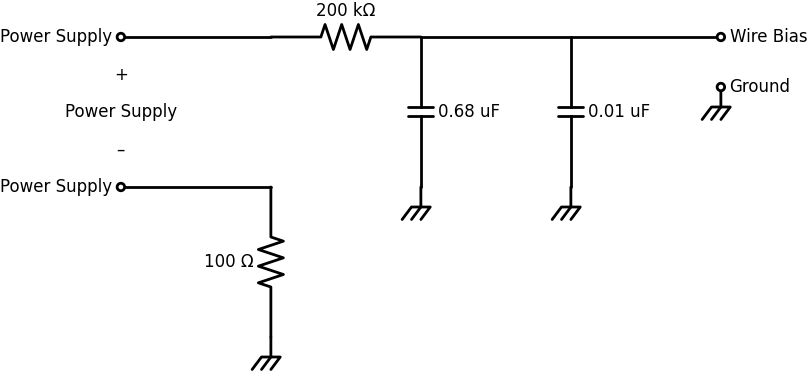

In [9]:
with schemdraw.Drawing(show=True, file='wire_bias_filter.pdf') as WireBias:
    WireBias.config(fontsize=12)
    P = elm.Dot(open=True).label("Power Supply", loc="left")
    L = elm.Line().right()
    R = elm.Resistor().label("200 kΩ", loc="top")
    _ = elm.Capacitor().down().label("0.68 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(R.end).right()
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(C.start).right()
    D = elm.Dot(open=True).label("Wire Bias", loc="right")

    # WireBias.move_from(L.start, dx=0, dy=-1)
    _ = Gap().at(P.start).down().label(['+','Power Supply','–'], loc="center")
    _ = elm.Dot(open=True).label("Power Supply", loc="left")
    _ = elm.Line().right()
    _ = elm.Resistor().down().label("100 Ω", loc="top")
    _ = elm.GroundChassis()

    WireBias.move_from(D.start, dx=0, dy=-1)
    _ = elm.Dot(open=True).label("Ground", loc="right")
    _ = elm.GroundChassis()
    
    
    # d1 += elm.Resistor()
    # d1.push()
    # d1 += elm.Capacitor().down()
    # d1 += elm.Line().left()
    # d1.pop()

(0, 0)


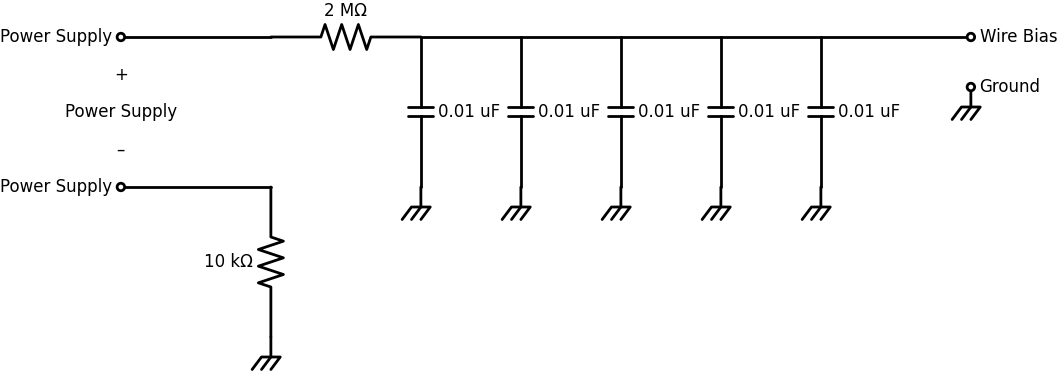

In [20]:
with schemdraw.Drawing(show=True, file='wire_bias_filter.pdf') as WireBias:
    WireBias.config(fontsize=12)
    P = elm.Dot(open=True).label("Power Supply", loc="left")
    L = elm.Line().right()
    R = elm.Resistor().label("2 MΩ", loc="top")
    _ = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(R.end).right().length(2.0)
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(C.start).right().length(2.0)
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(C.start).right().length(2.0)
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(C.start).right().length(2.0)
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    
    _ = elm.Line().at(C.start).right()
    D = elm.Dot(open=True).label("Wire Bias", loc="right")

    # WireBias.move_from(L.start, dx=0, dy=-1)
    _ = Gap().at(P.start).down().label(['+','Power Supply','–'], loc="center")
    _ = elm.Dot(open=True).label("Power Supply", loc="left")
    _ = elm.Line().right()
    _ = elm.Resistor().down().label("10 kΩ", loc="top")
    _ = elm.GroundChassis()

    WireBias.move_from(D.start, dx=0, dy=-1)
    _ = elm.Dot(open=True).label("Ground", loc="right")
    _ = elm.GroundChassis()
    
    
    # d1 += elm.Resistor()
    # d1.push()
    # d1 += elm.Capacitor().down()
    # d1 += elm.Line().left()
    # d1.pop()

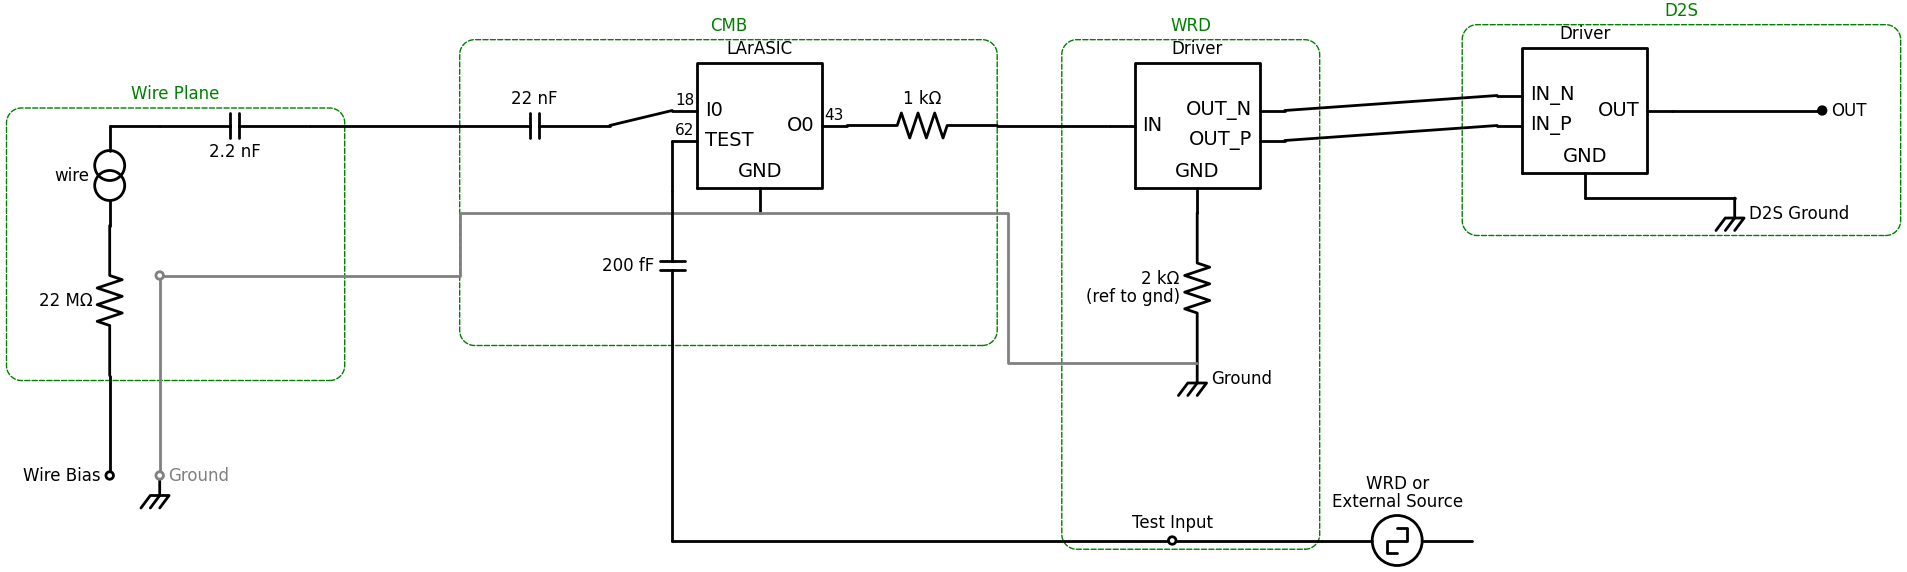

In [7]:
with schemdraw.Drawing(file='my_circuit.pdf') as d:
    d.config(fontsize=12)
    
    S1 = elm.CurrentMirror().up().length(2).label("wire", loc="top")
    R1 = elm.Resistor().at(S1.start).down().label("22 MΩ", loc="top")
    __ = elm.Line().down().length(2)
    D1 = elm.Dot(open=True).label('Wire Bias', loc='left')

    d.move_from(D1.end, dx=1, dy=0)
    D2 = elm.Dot(open=True).label('Ground', loc='right').color('grey')
    G0 = elm.GroundChassis()#.label("Detector Ground", loc="right")
    LG = elm.Line().up().length(4).color('grey')
    D3 = elm.Dot(open=True).color('grey')
    
    
    L1 = elm.Line().at(S1.end).right().length(1)
    
    # C2 = elm.Dot(open=True).label("wire", loc="top")
    C3 = elm.Capacitor().label("2.2 nF", loc="bottom")
    # R1 = elm.Resistor().down().label("22 MΩ", loc="bottom")
    # G0 = elm.GroundChassis().label("Detector Ground", loc="right")
    L1 = elm.Line().at(C3.end).right().length(3)
    C7 = elm.Capacitor().right().label('22 nF', loc='top')

    elm.EncircleBox([S1, R1, C3], padx=0.7, pady=0.1).linestyle('--').linewidth(1).color('green').label('Wire Plane', loc='top', rotate=0)

    d.move_from(C7.end, dx=3, dy=0)

    
    A1 = (elm.Ic()
          .pin('L', 'TEST', pin='62')
          .pin('L', 'I0', pin='18') # Inhibit
          .pin('R', 'O0', pin='43') # Inhibit
          .pin('B', 'GND', pin='') # Inhibit
          # .side('B', spacing=1, pad=.75, leadlen=.75)
          # .side('L', spacing=1, pad=1.5, leadlen=.6)
          .label('LArASIC', loc='top').right().anchor('center'))
    
    L2 = elm.Line().endpoints(C7.end, A1.I0).right().length(3)

    elm.OrthoLines(n=1).at(D3.end).to(A1.GND).color('grey')
    
    # Test Input
    __ = elm.Line().at(A1.TEST).down().length(1)
    C8 = elm.Capacitor().down().label('200 fF', loc='top')
    L2 = elm.Line().down().length(4)
    L2 = elm.Line().right().length(10)
    D3 = elm.Dot(open=True).label('Test Input')
    __ = elm.Line().right().length(3)
    S2 = elm.SourceSquare().right().label('WRD or\nExternal Source', loc='top')

    # Output
    R2 = elm.Resistor().at(A1.O0).label("1 kΩ", loc="top")
    elm.EncircleBox([C7, A1, R2, C8], padx=0, pady=0.1).linestyle('--').linewidth(1).color('green').label('CMB', loc='top', rotate=0)
    

    d.move_from(R2.end, dx=4, dy=0)

    #
    # WRD
    #
    
    A2 = (elm.Ic()
          .pin('L', 'IN', pin='')
          .pin('R', 'OUT_P', pin='')
          .pin('R', 'OUT_N', pin='') 
          .pin('B', 'GND', pin='') 
          .label('Driver', loc='top').right().anchor('center'))

    L3 = elm.Line().endpoints(R2.end, A2.IN).length(3)
    
    # G1 = elm.GroundSignal().at(A2.GND).up().label("Circuit Common", loc="bottom")
    R3 = elm.Resistor().at(A2.GND).down().label("2 kΩ\n(ref to gnd)", loc="top")
    G2 = elm.GroundChassis().label("Ground", loc="right")

    elm.OrthoLines(n=1).at(A1.GND).to(G2.start).color('grey')
    
    elm.EncircleBox([A2, R3, G2, D3], padx=0.7, pady=0.1).linestyle('--').linewidth(1).color('green').label('WRD', loc='top', rotate=0)
    
    d.move_from(A2.OUT_N, dx=6, dy=0)

    #
    # D2S
    #
    
    A3 = (elm.Ic()
          .pin('R', 'OUT', pin='')
          .pin('L', 'IN_P', pin='')
          .pin('L', 'IN_N', pin='') 
          .pin('B', 'GND', pin='') 
          .label('Driver', loc='top').right().anchor('center'))

    L3 = elm.Line().endpoints(A2.OUT_N, A3.IN_N)
    L3 = elm.Line().endpoints(A2.OUT_P, A3.IN_P)
    L3 = elm.Line().at(A3.GND).right().length(3)
    G3 = elm.GroundChassis().label("D2S Ground", loc="right")
    L3 = elm.Line().at(A3.OUT).right()
    D3 = elm.Dot(open=False).label("OUT", loc="right")
    
    elm.EncircleBox([A3, G3, D3], padx=0.7, pady=0.1).linestyle('--').linewidth(1).color('green').label('D2S', loc='top', rotate=0)

    #
    # Wire Bias
    #
    # d.move_from(D1.end, dx=-2, dy=-3)
    # elm.ElementDrawing(WireBias)


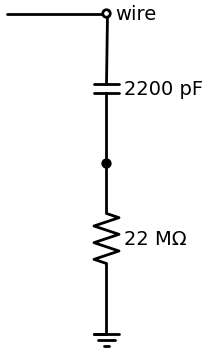

In [6]:
with schemdraw.Drawing() as d:
    # TPC wire
    d += elm.Line().right().length(2)
    d += elm.Dot(open=True).label("wire", loc="right")  # Open node representing the wire
    
    # Capacitance to ground
    d += elm.Capacitor().down().label("2200 pF", loc="bottom")
    d += elm.Dot(open=False)  # Open node representing the wire
    # d += elm.Ground()
    
    # Resistance in parallel
    d += elm.Resistor().down().label("22 MΩ", loc="bottom")
    d += elm.Ground()

    # Readout circuit
    # d += elm.Line().up().length(3).at(d.here)
    # d += elm.Dot()  # Connection point
    # d += elm.Line().left().length(2)  # Completing the loop

    # Display the circuit
    # d.show()


In [1]:
with schemdraw.Drawing(show=True, file='wire_bias_filter.pdf') as WireBias:
    WireBias.config(fontsize=12)
    _ = elm.Dot(open=True).label("Power Supply", loc="left")
    L = elm.Line().right()
    R = elm.Resistor().label("200 kΩ", loc="top")
    _ = elm.Capacitor().down().label("0.68 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(R.end).right()
    C = elm.Capacitor().down().label("0.01 uF", loc="bottom")
    _ = elm.GroundChassis()
    _ = elm.Line().at(C.start).right()
    D = elm.Dot(open=True).label("Wire Bias", loc="right")

    WireBias.move_from(L.start, dx=0, dy=-1)
    _ = elm.Dot(open=True).label("Power Supply", loc="left")
    _ = elm.Line().right()
    _ = elm.Resistor().down().label("100 Ω", loc="top")
    _ = elm.GroundChassis()

    WireBias.move_from(D.start, dx=0, dy=-1)
    _ = elm.Dot(open=True).label("Ground", loc="right")
    _ = elm.GroundChassis()

NameError: name 'schemdraw' is not defined

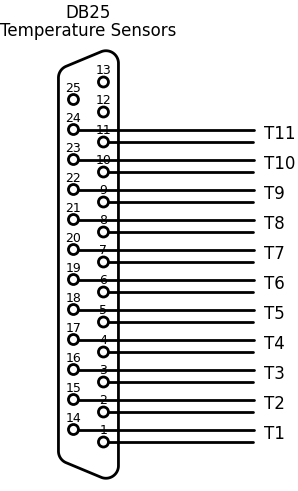

In [44]:
with schemdraw.Drawing(show=True, file='temperature_sensors.pdf') as d:
    d.config(fontsize=12)
    C = elm.DB25(number=True).label("DB25\nTemperature Sensors", loc="top")

    l = elm.Line().at(C.pin1).right()
    _ = elm.Line().at(C.pin14).to(l.end).right()
    _ = elm.Label().label('T1', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin2).right()
    _ = elm.Line().at(C.pin15).to(l.end).right()
    _ = elm.Label().label('T2', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin3).right()
    _ = elm.Line().at(C.pin16).to(l.end).right()
    _ = elm.Label().label('T3', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin4).right()
    _ = elm.Line().at(C.pin17).to(l.end).right()
    _ = elm.Label().label('T4', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin5).right()
    _ = elm.Line().at(C.pin18).to(l.end).right()
    _ = elm.Label().label('T5', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin6).right()
    _ = elm.Line().at(C.pin19).to(l.end).right()
    _ = elm.Label().label('T6', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin7).right()
    _ = elm.Line().at(C.pin20).to(l.end).right()
    _ = elm.Label().label('T7', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin8).right()
    _ = elm.Line().at(C.pin21).to(l.end).right()
    _ = elm.Label().label('T8', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin9).right()
    _ = elm.Line().at(C.pin22).to(l.end).right()
    _ = elm.Label().label('T9', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin10).right()
    _ = elm.Line().at(C.pin23).to(l.end).right()
    _ = elm.Label().label('T10', loc='right', ofst=0.1, valign='top')

    l = elm.Line().at(C.pin11).right()
    _ = elm.Line().at(C.pin24).to(l.end).right()
    _ = elm.Label().label('T11', loc='right', ofst=0.1, valign='top')
    

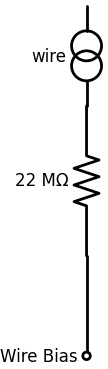

In [8]:
import schemdraw
import schemdraw.elements as elm

class CustomRC(elm.ElementCompound):
    """Custom RC circuit: Resistor in series with a parallel (R, C) network."""
    def __init__(self, unit: float = 1.5, **kwargs):
        super().__init__(unit=unit, **kwargs)

    def setup(self):

        _ = self.add(elm.Dot(open=True).label("Power Supply", loc="left"))
        L = self.add(elm.Line().right())
        R = self.add(elm.Resistor().label("200 kΩ", loc="top"))
        _ = self.add(elm.Capacitor().down().label("0.68 uF", loc="bottom"))
        _ = self.add(elm.GroundChassis())
        _ = self.add(elm.Line().at(R.end).right())
        C = self.add(elm.Capacitor().down().label("0.01 uF", loc="bottom"))
        _ = self.add(elm.GroundChassis())
        _ = self.add(elm.Line().at(C.start).right())
        D = self.add(elm.Dot(open=True).label("Wire Bias", loc="right"))
    
        WireBias.move_from(L.start, dx=0, dy=-1)
        _ = self.add(elm.Dot(open=True).label("Power Supply", loc="left"))
        _ = self.add(elm.Line().right())
        _ = self.add(elm.Resistor().down().label("100 Ω", loc="top"))
        _ = self.add(elm.GroundChassis())
    
        WireBias.move_from(D.start, dx=0, dy=-1)
        _ = self.add(elm.Dot(open=True).label("Ground", loc="right"))
        _ = self.add(elm.GroundChassis())


    
        # First resistor (R1) in series
        r1 = self.add(elm.Resistor().right().label('R1'))
        
        # Parallel branch start
        node1 = self.add(elm.Dot())  # Branching node
        
        # Capacitor (C1) going downward
        c1 = self.add(elm.Capacitor().down().label('C1'))
        
        # Resistor (R2) going downward in parallel
        self.add(elm.Wire().at(node1.center))  # Restore position for R2
        r2 = self.add(elm.Resistor().down().label('R2'))
        
        # Connecting parallel elements back to the main line
        join_node = self.add(elm.Dot())  # Closing the parallel connection
        self.add(elm.Wire().right().at(join_node.center))  # Continue the circuit

        # Define external connection points
        self.anchors['in'] = r1.start  # Input terminal
        self.anchors['out'] = join_node.center  # Output terminal


with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    
    S1 = elm.CurrentMirror().up().length(2).label("wire", loc="top")
    R1 = elm.Resistor().at(S1.start).down().label("22 MΩ", loc="top")
    __ = elm.Line().down().length(2)
    D1 = elm.Dot(open=True).label('Wire Bias', loc='left')


# Create a schematic with the custom RC component
# with schemdraw.Drawing() as d:
#     elm.SourceSquare().right().label('WRD or\nExternal Source', loc='top')
    # rc = CustomRC().right()
    # elm.Ground().at(rc.anchors['out'])

    # d.draw()
